# Spatial Analysis

Using examples from 
- http://pysal.org/notebooks/viz/splot/esda_morans_viz.html
- http://darribas.org/gds15/content/labs/lab_06.html

Add population density
Add furlough and co-location? Remove areas where low desnity
https://mgimond.github.io/Spatial/uncertainty-in-census-data.html

Just map a covid - but don't show areas with such low population density

Spatial correlation of COVID mortality?
Spatial correlation of Furlought (spatial?)
Spatial correlation of higher ethnicicities ?
Spatial correlation of COVID cases ?

In [1]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [2]:
import sys
sys.path.insert(0, '../src/data')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import bame_datastore

Found local clean copy of Local_Authority_Districts__December_2017__Boundaries_in_the_UK__WGS84_
Found local clean copy of fbook_covid_cases
Found local clean copy of BAME_report_cases
Found local clean copy of BAME_report_deaths
Found local clean copy of bame_excess_deaths
Found local clean copy of ons_deaths
Found local clean copy of excess_deaths_data_grp
Found local clean copy of excess_deaths_data_loc
Found local clean copy of ethnicity_2011
Found local clean copy of furlough_data
Found local clean copy of key_workers
Found local clean copy of deprivation_data
Found local clean copy of population_est_data


In [54]:
master_df.sort_values(by="allexcess", ascending=False).head(30)

,name,week,pop,deaths.1519,AllCause.20,COVID.20,Other.20,allexcess,excessrate_sum,othexcess_sum,excessrate_mean,othexcess_mean,COVIDrate
code,,,,,,,,,,,,,
E08000025,Birmingham,25,1141374.0,8475.2,5751.0,1209.0,4542.0,1098.4,96.234889,-110.6,1.573064,-0.242424,1.594304
E06000047,County Durham,25,526980.0,5626.8,3534.0,703.0,2831.0,471.0,89.377206,-232.0,1.584788,-2.057576,1.975235
E08000012,Liverpool,25,494814.0,4500.8,2911.0,573.0,2338.0,452.0,91.347456,-121.0,1.521845,-1.030303,1.730065
E06000049,Cheshire East,25,380790.0,3973.2,2608.0,541.0,2067.0,446.8,117.335014,-94.2,2.032457,-0.078788,2.053148
E09000008,Croydon,25,385346.0,2525.0,1802.0,492.0,1310.0,445.0,115.480633,-47.0,1.797676,-0.466667,1.918779
E09000005,Brent,25,330795.0,1728.8,1363.0,488.0,875.0,436.2,131.864145,-51.8,2.106037,-0.381818,2.221462
E09000003,Barnet,25,392140.0,2397.0,1737.0,454.0,1283.0,426.0,108.634671,-28.0,1.809032,0.230303,1.750303
E09000010,Enfield,25,333869.0,2059.4,1526.0,388.0,1138.0,407.8,122.143715,19.8,1.960486,0.712121,1.747192
E08000032,Bradford,25,537173.0,4511.2,2853.0,495.0,2358.0,388.2,72.267221,-106.8,1.228090,-0.675758,1.353889


In [30]:
master_df = bame_datastore.excess_deaths_grp.df

# master_df = pd.read_csv("../data/processed/dense_df.csv", index_col=0).drop(columns = "geometry")
# master_df["pct_bame"] = master_df.Other+master_df.Black_African_Caribbean+master_df.Asian+master_df.Mixed

In [32]:
gdf1 = bame_datastore.lad_geog.gdf.set_index("lad17cd")
gdf = gdf1.join(master_df)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 391 entries, E06000001 to W06000024
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   objectid         391 non-null    int64   
 1   lad17nm          391 non-null    object  
 2   lad17nmw         391 non-null    object  
 3   bng_e            391 non-null    int64   
 4   bng_n            391 non-null    int64   
 5   long             391 non-null    float64 
 6   lat              391 non-null    float64 
 7   st_areashape     391 non-null    float64 
 8   st_lengthshape   391 non-null    float64 
 9   geometry         391 non-null    geometry
 10  name             305 non-null    object  
 11  week             305 non-null    float64 
 12  pop              305 non-null    float64 
 13  deaths.1519      305 non-null    float64 
 14  AllCause.20      305 non-null    float64 
 15  COVID.20         305 non-null    float64 
 16  Other.20         305 non-nu

In [4]:
# missing_rows= gdf[gdf.isna().any(axis=1)]
# missing_rows.sort_values(by = "area")

In [34]:
comp_var = "excess_deaths_per_thsd"
comp_var2 = "pct_65+"


df = master_df.set_index("name")[[comp_var, comp_var2]]
df = df.sort_values(by = comp_var, ascending=False)

fig = plt.figure(figsize=(40, 10)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df[comp_var].plot(kind='bar', color='red', ax=ax, width=width, position=1)
df[comp_var2].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel(comp_var)
ax2.set_ylabel(comp_var2)

plt.show()

KeyError: "None of [Index(['excess_deaths_per_thsd', 'pct_65+'], dtype='object')] are in the [columns]"

# Spatial Analysis

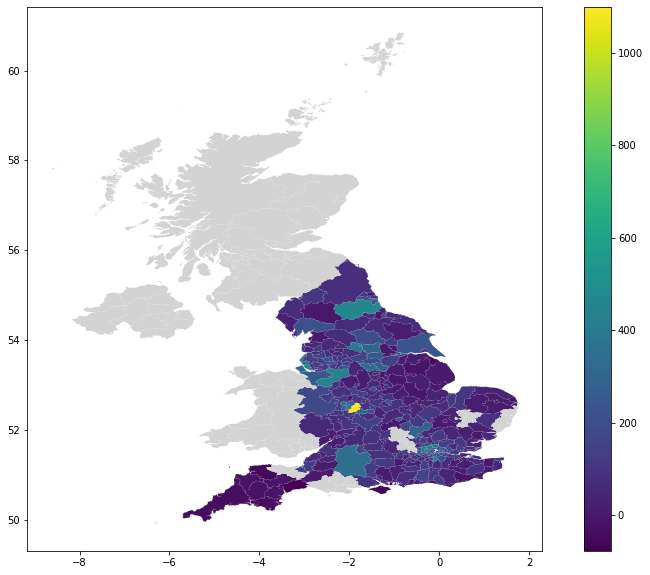

In [36]:
target_col = "allexcess"
# gdf = gdf.dropna(subset=[target_col])
gdf.plot(column=target_col, cmap='viridis', legend=True, figsize=(15, 10),
         missing_kwds = dict(color = "lightgrey"))

In [37]:
gdf = gdf.dropna(subset=[target_col])
y = gdf[target_col].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'

('WARNING: ', 43, ' is an island (no neighbors)')


/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 43.
  warnings.warn(message)


In [38]:
# spatial Autocorrelation

from esda.moran import Moran

w = Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I

('WARNING: ', 43, ' is an island (no neighbors)')


/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 43.
  warnings.warn(message)


0.36587200079492105

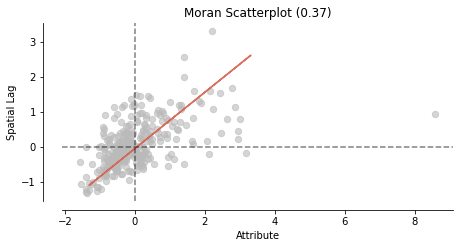

In [39]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

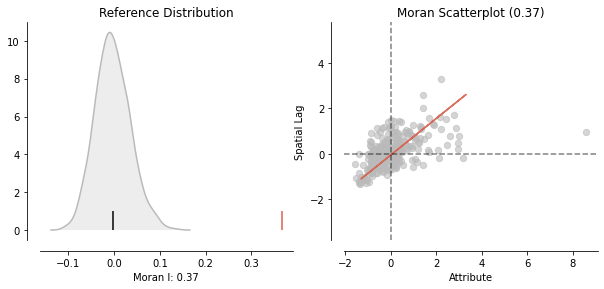

In [40]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [41]:
moran.p_sim



0.001

/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/esda/moran.py:886: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


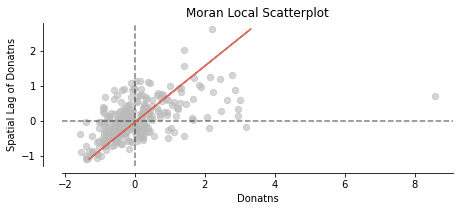

In [42]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()


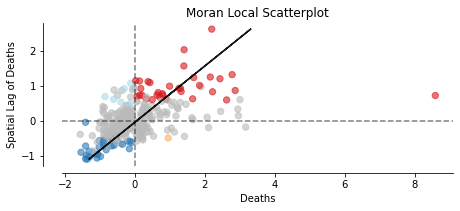

In [43]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Deaths')
ax.set_ylabel('Spatial Lag of Deaths')
plt.show()

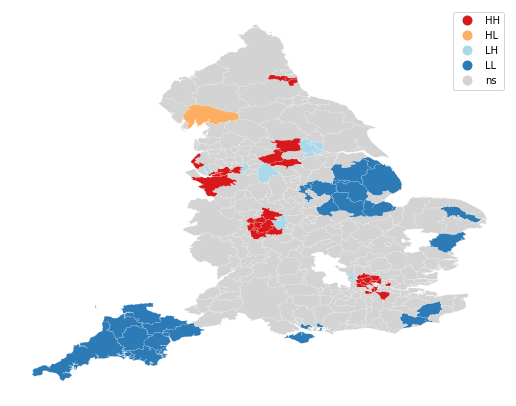

In [45]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.savefig(f"../reports/figures/spatial_cor_{target_col}.png")
plt.show()
